In [1]:
import haiku as hk
import jax
import jax.numpy as jnp
import jax.tree_util as jtree

import numpy as np
import optax
from typing import Sequence, NamedTuple
import json

import matplotlib.pyplot as plt

from expt_dln import ex

In [36]:
config = {
    "expt_name": "hyperparam_tuning_run",
    "do_compute_distance": False,
    "do_functional_rank": False,
    "do_hessian_trace": False,
    "do_training": False,
    "input_dist": "uniform",
    "input_dim": 100,
    # "layer_widths": [1000, 1000],
    "layer_widths": np.random.randint(10, 100, size=10),
    "num_training_data": 100000,
    "seed": 42,
    "sgld_config": {
        "batch_size": 128,
        "epsilon": 1e-6,
        "gamma": 1.0,
        "num_chains": 1,
        "num_steps": 50000
    },
    "true_param_config": {
        "mean": 0.0,
        "method": "zero",
        "prop_rank_reduce": 0.5,
        "std": 5.0
    },
    "verbose": True
}
print(config["layer_widths"], f"num layer={len(config['layer_widths'])}")
run = ex.run(config_updates=config)

WARNING - root - Changed type of config entry "layer_widths" from list to ndarray
WARNING - dln_lambdahat - No observers have been added to this run
INFO - dln_lambdahat - Running command 'run_experiment'
INFO - dln_lambdahat - Started


[73 67 69 45 52 55 13 30 27 48] num layer=10
Step 0, loss: 0.0
Step 200, loss: 1.2083000731307431e-19
Step 400, loss: 1.1043117934445056e-16
Step 600, loss: 8.270974339176073e-15
Step 800, loss: 1.5330541469540243e-13
Step 1000, loss: 1.5170779129464185e-12
Step 1200, loss: 1.3665223466685639e-11
Step 1400, loss: 5.816985781947892e-11
Step 1600, loss: 2.937541876413263e-10
Step 1800, loss: 8.032629561505189e-10
Step 2000, loss: 1.5988782520182099e-09
Step 2200, loss: 5.593231655609543e-09
Step 2400, loss: 1.2516348846247638e-08
Step 2600, loss: 2.192404124912173e-08
Step 2800, loss: 4.010254173181238e-08
Step 3000, loss: 5.966376903643322e-08
Step 3200, loss: 1.4147109084206022e-07
Step 3400, loss: 2.4905722284529475e-07
Step 3600, loss: 3.375920414327993e-07
Step 3800, loss: 8.556133934689569e-07
Step 4000, loss: 1.4643594568042317e-06
Step 4200, loss: 2.310887111889315e-06
Step 4400, loss: 4.2678648242144845e-06
Step 4600, loss: 6.863636372145265e-06
Step 4800, loss: 1.27911462186602

INFO - dln_lambdahat - Completed after 0:02:17


lambdahat                : 141.061767578125
lambdahat_with_burnin    : 210.8369253533174
true_lambda              : 163.0
true_multiplicity        : 1.0
true_rank                : 0
model_dim                : 28330
Mean MALA accept probs   : 0.8539


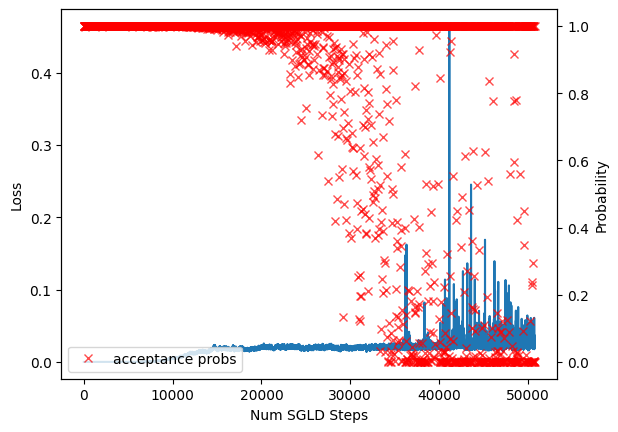

In [38]:
loss_trace = run.info['loss_trace']
init_loss = run.info['init_loss']
BURNIN_PROP = 0.9
nsteps = len(loss_trace)
burnin = int(nsteps * BURNIN_PROP)
n = run.config["num_training_data"]
run.info["lambdahat_with_burnin"] = (np.mean(loss_trace[burnin:]) - init_loss) * n / np.log(n)

for elem in ["lambdahat", "lambdahat_with_burnin", "true_lambda", "true_multiplicity", "true_rank", "model_dim"]:
    print(f"{elem:25s}: {run.info[elem]}")

probs = np.array(run.info["mala_acceptance_probs"])
mean_prob = probs[:, 1].mean()
print(f"Mean MALA accept probs   : {mean_prob:.4f}")


fig, ax = plt.subplots()
ax.plot(run.info["loss_trace"], label="loss trace")
ax.set_ylabel("Loss")
ax.set_xlabel("Num SGLD Steps")
# ax.legend()
ax = ax.twinx()
ax.plot(probs[:, 0], probs[:, 1], "rx", label="acceptance probs", alpha=0.7)

ax.set_ylabel("Probability")
ax.set_xlabel("Num SGLD Steps")
ax.legend();
